In [7]:
import matplotlib.pyplot as plt
import numpy as np
import sys, os
sys.path.append(os.environ['raco'])
sys.path.append(os.environ['rapp'])
sys.path.append(os.environ['rapl'])
from common import *
from plotcommon import *
from cla_util import *
from rayleigh_diagnostics import GridInfo

In [8]:
dirname = '/nobackup/lmatilsk/benchmarks/j2011_mhd-1dom/00_test_equations/'

In [9]:
os.listdir(dirname + 'data')

['Point_Probes_trace-15000001_15000100.pkl']

In [10]:
# get point probes data 
di = get_dict(dirname + 'data/' + 'Point_Probes_trace-15000001_15000100.pkl')
vals = di['vals']
times = di['times']
iters = di['iters']
lut = di['lut']
rvals = di['rvals']
thetavals = di['thetavals']
phivals = di['phivals']

# get grid info
di_grid = get_grid_info(dirname)
rr = di_grid['rr']
tt = di_grid['tt']
phi = di_grid['phi']
tt_lat = di_grid['tt_lat']
lons = di_grid['lons']

irvals = inds_from_vals(rr, rvals)
ithetavals = inds_from_vals(tt, thetavals)
iphivals = inds_from_vals(phi, phivals)

print ('irvals = ', irvals)
print ('ithetavals = ', ithetavals)
print ('iphivals = ', iphivals)

print ('rvals/rsun = ', rr[irvals]/rsun)
print ('tt_lat = ', tt_lat[ithetavals])
print ('lons = ', lons[iphivals])

print ('shape(vals) = ', np.shape(vals))
print ('nphi, ntheta, nr = ', di_grid['nphi'], di_grid['nt'], di_grid['nr'])

irvals =  [ 12  20  29  36  42  48  53  58  61  63  66  69  74  79  85  91  98 107
 115]
ithetavals =  [ 10  24  48  72  95 119 143 167 181]
iphivals =  [  0  48  96 144 191 239 287 335]
rvals/rsun =  [0.0990935  0.09656762 0.09241647 0.0883522  0.08438459 0.08006052
 0.07625216 0.07231844 0.0699226  0.06831853 0.06591181 0.06351597
 0.05958225 0.05577389 0.05144982 0.04748221 0.04341794 0.03926679
 0.03674091]
tt_lat =  [-79.94696225 -66.85669072 -44.41539505 -21.97394799  -0.46753089
  21.97394799  44.41539505  66.85669072  79.94696225]
lons =  [  0.      45.      90.     135.     179.0625 224.0625 269.0625 314.0625]
shape(vals) =  (100, 8, 9, 19, 89)
nphi, ntheta, nr =  384 192 128


In [11]:
np.where(lut !=4000)

(array([ 201,  202,  203,  402,  403,  404,  701,  801,  802,  803, 1102,
        1103, 1104, 1201, 1202, 1203, 1210, 1211, 1212, 1216, 1219, 1220,
        1221, 1228, 1229, 1230, 1237, 1238, 1239, 1248, 1249, 1250, 1401,
        1402, 1406, 1421, 1434, 1435, 1436, 1601, 1602, 1603, 1604, 1605,
        1606, 1607, 1608, 1609, 1610, 1611, 1612, 1613, 1614, 1615, 1801,
        1802, 1803, 1804, 1805, 1806, 1819, 1822, 1901, 1904, 1907, 1910,
        1916, 2019, 2025, 2026, 2027, 2043, 2044, 2045, 2201, 2202, 2203,
        2204, 2205, 2206, 2207, 2208, 2209, 2210, 2211, 2212, 2213, 2214,
        2215]),)

In [12]:
prot = compute_Prot(dirname)
t = times/prot

In [13]:
np.diff(times)

array([200., 200., 200., 200., 200., 200., 200., 200., 200., 200., 200.,
       200., 200., 200., 200., 200., 200., 200., 200., 200., 200., 200.,
       200., 200., 200., 200., 200., 200., 200., 200., 200., 200., 200.,
       200., 200., 200., 200., 200., 200., 200., 200., 200., 200., 200.,
       200., 200., 200., 200., 200., 200., 200., 200., 200., 200., 200.,
       200., 200., 200., 200., 200., 200., 200., 200., 200., 200., 200.,
       200., 200., 200., 200., 200., 200., 200., 200., 200., 200., 200.,
       200., 200., 200., 200., 200., 200., 200., 200., 200., 200., 200.,
       200., 200., 200., 200., 200., 200., 200., 200., 200., 200., 200.])

In [14]:
# thermo state
eq = get_eq(dirname)

In [15]:
iir0, iit0, iiphi0 = 0, 0, 0

ir0, it0, iphi0 = irvals[iir0], ithetavals[iit0], iphivals[iiphi0]

print ("r/rsun = ", rvals[iir0]/rsun)
print ("lat = ", tt_lat[it0])
print ("lon = ", lons[iphi0])

rhovr = vals[:, iiphi0, iit0, iir0, lut[201]]

adv_r = -vals[:, iiphi0, iit0, iir0, lut[1201]]
buoy = vals[:, iiphi0, iit0, iir0, lut[1216]]
cor_r = vals[:, iiphi0, iit0, iir0, lut[1219]]

visc_r = vals[:, iiphi0, iit0, iir0, lut[1228]]
gradp_r = vals[:, iiphi0, iit0, iir0, lut[1237]]

jxb_r = vals[:, iiphi0, iit0, iir0, lut[1248]]

r/rsun =  0.09909349660182648
lat =  -79.94696224738567
lon =  0.0


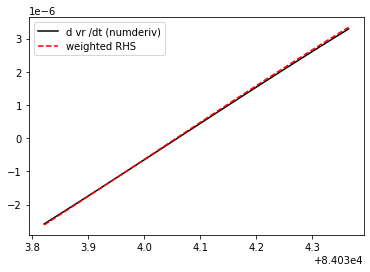

In [16]:
# compare two forces

# discrete time derivative (LHS)
drhovr = rhovr[2:] - rhovr[1:-1]
dt = times[2:] - times[1:-1]
dt_old = times[1:-1] - times[:-2]
drhovrdt = drhovr/dt

# RHS (some of source/sink terms)
f_exp = cor_r + adv_r + jxb_r
f_imp = gradp_r + buoy + visc_r
rhs_momr = f_weighted = 0.5*(f_imp[2:] + f_imp[1:-1]) + f_exp[1:-1] + 0.5*(dt/dt_old)*(f_exp[1:-1] - f_exp[:-2])

plt.plot(t[2:], drhovrdt, 'k', label='d vr /dt (numderiv)')
plt.plot(t[2:], f_weighted, 'r--', label='weighted RHS')
#plt.plot(t, f_r/rho[ir0], label='weighted RHS')

plt.legend()

In [17]:
# well that looks pretty good!

In [18]:
#Let's look at rho_v_theta
rhovt = vals[:, iiphi0, iit0, iir0, lut[202]]

adv_t = -vals[:, iiphi0, iit0, iir0, lut[1202]]
cor_t = vals[:, iiphi0, iit0, iir0, lut[1220]]

visc_t = vals[:, iiphi0, iit0, iir0, lut[1229]]
gradp_t = vals[:, iiphi0, iit0, iir0, lut[1238]]

jxb_t = vals[:, iiphi0, iit0, iir0, lut[1249]]

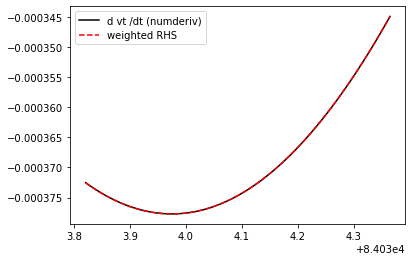

In [19]:
drhovt = rhovt[2:] - rhovt[1:-1]
drhovtdt = drhovt/dt

f_exp = cor_t + adv_t + jxb_t
f_imp = gradp_t + visc_t

rhs_momt = f_weighted = 0.5*(f_imp[2:] + f_imp[1:-1]) + f_exp[1:-1] + 0.5*(dt/dt_old)*(f_exp[1:-1] - f_exp[:-2])

plt.plot(t[2:], drhovtdt, 'k', label='d vt /dt (numderiv)')
plt.plot(t[2:], f_weighted, 'r--', label='weighted RHS')
#plt.plot(t, f_r/rho[ir0], label='weighted RHS')

plt.legend()

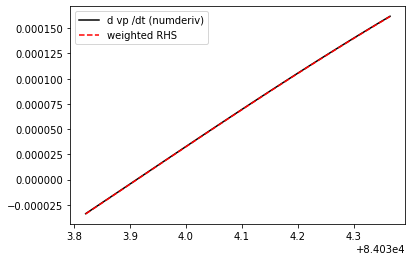

In [20]:
# and then phi
rhovp = vals[:, iiphi0, iit0, iir0, lut[203]]
drhovp = rhovp[2:] - rhovp[1:-1]
drhovpdt = drhovp/dt

adv_p = -vals[:, iiphi0, iit0, iir0, lut[1203]]
cor_p = vals[:, iiphi0, iit0, iir0, lut[1221]]

visc_p = vals[:, iiphi0, iit0, iir0, lut[1230]]
gradp_p = vals[:, iiphi0, iit0, iir0, lut[1239]]

jxb_p = vals[:, iiphi0, iit0, iir0, lut[1250]]

f_exp = cor_p + adv_p + jxb_p
f_imp = gradp_p + visc_p
rhs_momp = f_weighted = 0.5*(f_imp[2:] + f_imp[1:-1]) + f_exp[1:-1] + 0.5*(dt/dt_old)*(f_exp[1:-1] - f_exp[:-2])

plt.plot(t[2:], drhovpdt, 'k', label='d vp /dt (numderiv)')
plt.plot(t[2:], f_weighted, 'r--', label='weighted RHS')
#plt.plot(t, f_r/rho[ir0], label='weighted RHS')

plt.legend()

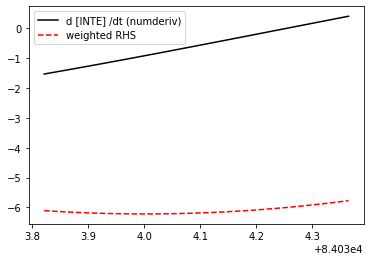

In [27]:
# for good measure, see what heat equation does
inte = vals[:, iiphi0, iit0, iir0, lut[701]]
dinte = inte[2:] - inte[1:-1]
dintedt = dinte/dt

adv_heat = -vals[:, iiphi0, iit0, iir0, lut[1401]]
ref_adv_heat = -rhovr*(eq.T*eq.dsdr)[ir0]*0
cond_heating = vals[:, iiphi0, iit0, iir0, lut[1421]]
int_heating = vals[:, iiphi0, iit0, iir0, lut[1434]]
visc_heating = vals[:, iiphi0, iit0, iir0, lut[1435]]
joule_heating = vals[:, iiphi0, iit0, iir0, lut[1436]]

f_exp = adv_heat + visc_heating + joule_heating + int_heating
f_imp = ref_adv_heat + cond_heating
f_weighted = 0.5*(f_imp[2:] + f_imp[1:-1]) + f_exp[1:-1] + 0.5*(dt/dt_old)*(f_exp[1:-1] - f_exp[:-2])

plt.plot(t[2:], dintedt, 'k', label='d [INTE] /dt (numderiv)')
plt.plot(t[2:], f_weighted, 'r--', label='weighted RHS')
#plt.plot(t, f_r/rho[ir0], label='weighted RHS')

plt.legend()

In [22]:
# yeah this guy isn't so hot

In [23]:
# check numerical errors in the momentum equation
print ("err mom r = ", np.std(rhs_momr - drhovrdt)/np.std(drhovrdt))
print ("err mom t = ", np.std(rhs_momt - drhovtdt)/np.std(drhovtdt))
print ("err mom p = ", np.std(rhs_momp - drhovpdt)/np.std(drhovpdt))

err mom r =  0.014841472487849797
err mom t =  0.0015545050724592006
err mom p =  0.00028008894393798263


In [24]:
# pretty exact ... check three domains

In [25]:
eq.dsdr

array([0.00562909, 0.00562923, 0.0056295 , 0.00562992, 0.00563049,
       0.0056312 , 0.00563206, 0.00563309, 0.00563429, 0.00563566,
       0.00563721, 0.00563897, 0.00564093, 0.0056431 , 0.00564551,
       0.00564817, 0.00565109, 0.00565428, 0.00565777, 0.00566156,
       0.00566568, 0.00567015, 0.00567499, 0.0056802 , 0.00568582,
       0.00569187, 0.00569836, 0.00570532, 0.00571278, 0.00572074,
       0.00572924, 0.0057383 , 0.00574795, 0.0057582 , 0.00576908,
       0.00578062, 0.00579284, 0.00580576, 0.00581942, 0.00583383,
       0.00584903, 0.00586503, 0.00588187, 0.00589956, 0.00591815,
       0.00593764, 0.00595806, 0.00597945, 0.00600183, 0.00602522,
       0.00604965, 0.00607514, 0.00610172, 0.00612942, 0.00615825,
       0.00618825, 0.00621943, 0.00625182, 0.00628544, 0.00632032,
       0.00635647, 0.00639392, 0.00643269, 0.0064728 , 0.00651426,
       0.00655709, 0.00660131, 0.00664693, 0.00669396, 0.00674242,
       0.00679232, 0.00684366, 0.00689646, 0.0069507 , 0.00700